In [1]:
#Agenda
#How to use pandas library to read data into python
#how do i use seaborn library to visualzie data
#What is Linear Regression
#How do i train and interpret a linear regression 
#what are some evaluation metrics for regression problem
#How do i choose which features to include in my model

#Types of Supervised Learning
#Classification: Predict a categorical response
#Regression: Predict a continous response

In [7]:
import pandas as pd
data = pd.read_csv('/Users/riteshtripathi/Desktop/data.csv', index_col = 0)
#check the diff when u remove index_col
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
data.tail()


In [ ]:
data.shape
#we will use TV, Radio and NewsPaper as our features (Train)
#Sales as Response(Target)
#We would use Regression Problem, because our response variable is continous
#200 rows, as observations, and each obs is in a single market

In [4]:
import seaborn as sns

%matplotlib inline 
#allows plots to appear within the notebook

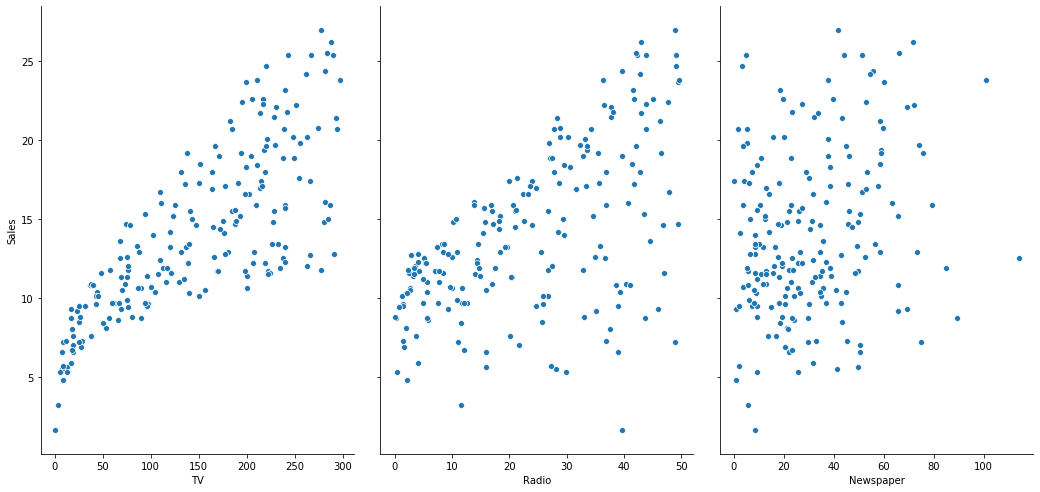

In [11]:
#Visualzie the relationship between the features and response using scatter plots
sns.pairplot(data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', height = 7, aspect = 0.7)

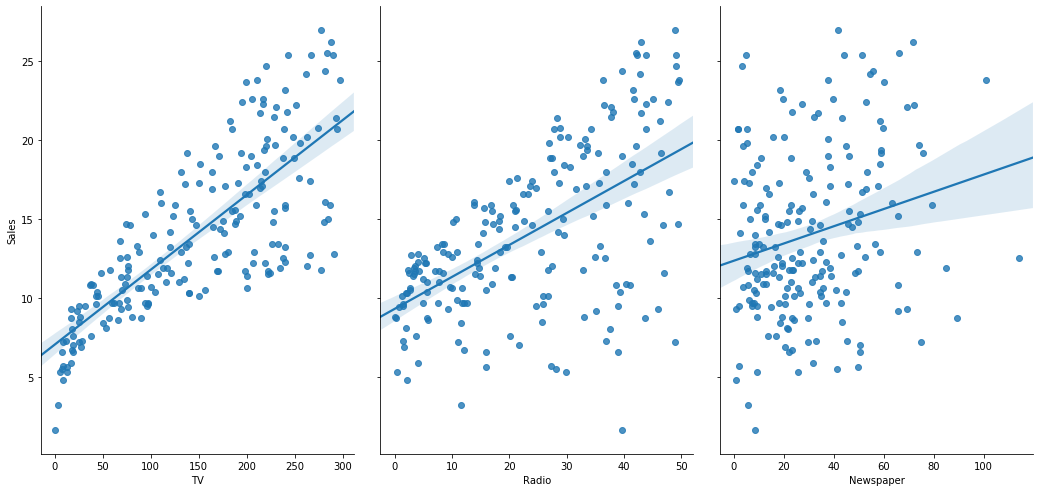

In [12]:
#there is linear relation ship between tv and sales
#as tv advertising increases, sales increases

#there is less strong relationship in radio advertising sales
#and weak relationship in newspaper advertising

#lets use seaborn to plot these relationship, best fit line, and 95% confidence band
#since there is linear relationship between feature and response, this is a great candidate for linear regression method
sns.pairplot(data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', height = 7, aspect = 0.7, kind = 'reg')

In [13]:
#Regression and Linear Regression
#Regression is kind of supervised learning where response is continous
#Linear Regression is a machine learning model that can use for regression problems
#In Linear Reg, there is no need to perform tunning

In [8]:
#Create a python list of features names
feature_cols = ['TV', 'Radio', 'Newspaper']

#Use the list to select a subset of the orignal dataframe
X = data[feature_cols]

#Equivalent command to do in one line
#X = data[['TV', 'Radio', 'Newspaper']]

#X Can be Dataframe
#y can be series

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [17]:
print(type(X))
X.shape

<class 'pandas.core.frame.DataFrame'>


(200, 3)

In [9]:
#Select a Series from DataFrame
y = data['Sales']

#Equivalent command that works if there are no spaces in the coln
#y = data.sales

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [20]:
type(y)
y.shape

(200,)

In [11]:
#Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [23]:
#default split is 75% for training and 25% for testing, since we didnt mention what size should be what
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(150, 3)
(150,)
(50, 3)
(50,)


In [12]:
#Linear Regression in Scikit Learn
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data
linreg.fit(X_train, y_train)
#here model is learning the intercepts and coefficients for the line of best fit


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#Interpreting model coefficients
#print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)


2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [26]:
#pair the features names with the coefficinets
zip(feature_cols, linreg.coef_)#this hasnt worked, its supposed to print out
#Tv: 0.46..
#and so on

In [27]:
#lets interpret tv coefficient
#for a given amount of radio and newspaper ad spending,  a unit increase in tv ad spending is associated with 
#a 0.0466 unit increase in sales

#OR
#for a given amount of Radio and newspaper ad spending, an additional $1000 spent on Tv ads is associated with 
#an increase in sales of 46.6 items

#if an increase in TV ad spending was associated with a decrease in sales B1 would be negative

#an unit of ad spending represents 1000 usd
#and a unit of sales, represents 1000 items

In [14]:
#Making Predictions on test data
y_pred = linreg.predict(X_test)


In [24]:
#instantiate
linreg = LinearRegression()

#fit the model to the training data
linreg.fit(X, y)

linreg.predict([[240, 38.1, 70.2]])

array([21.03256591])

In [ ]:
#we need an evaluation metric in order to compare our predictions with actual values
#we have so far used classification accuracy previously

#For Regression Models, Evaluation metrics can be
Mean Absolute Error
Mean Squared Error
Root Mean Squared Error


In [29]:
#MAE
true_value = [100.50,30,20]
pred_val = [90,50,50,30]
print(10+0+20+10)/4

from sklearn import metrics
print(metrics.mean_absolute_error(true_va, pred_val))

#MSE, harder to interpret than MAE
print(10**2 + 0**2 + 20**2 + 10**2)/4 #here each of the error is squared

print metrics.mean_squared_error(true, pred)

600


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [ ]:
#Root Mean Square Error, is identical to MSE
#except then the square root is done at the end of the caluclation
import numpy as np
print(np.sqrt(metrics.mean_squared_error(true_val, pred_val)))

In [ ]:
MAE: easiest to understand because its the average error
MSE: is more popular than MAE bse MSE punishes larger errors
RMS: is even more popular than MSE, bse RMS is interpretable in the y units
    

In [30]:
#therefore lets use RMSE to predict sales
import numpy as np
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


In [ ]:
#sales ranged from 5 to 25

#lets remove newspaper feature to see new rmse
#RMSE is now 1.38 after removing newspaper

#RMSE decreased when we removed newspaper, error is something we want to minimize, so a lower number of RMSE is better. 
#thus its unlikely that the feature is useful for predicting sales and should be removed from the model

In [6]:
from sklearn.model_selection import train_test_split